### Setup

In [ ]:
# Initial Setup:
# Import all the libraries we need

import matplotlib.pyplot as plt
# plt.tick_params(left=False, labelleft=False) #remove ticks

import numpy as np
import csv
import math
import random
from BSE_improved import Trader_PRZI
from BSE_improved import Trader_PRZI_JADE
from BSE_improved import Trader_PRZI_BEST1
from BSE_improved import market_session
import pandas as pd

# reload imports
%reload_ext autoreload
%autoreload 2


### Static Market Session

In [61]:
n_days = 10   
n_hours = 24*n_days
start_time = 0.0
end_time = 60*60*n_hours
duration = end_time - start_time

supRange = (60, 140)
demRange = (60, 140)
supply_schedule = [{'from': start_time, 'to': end_time, 'ranges': [supRange], 'stepmode': 'fixed'}]
demand_schedule = [{'from': start_time, 'to': end_time, 'ranges': [demRange], 'stepmode': 'fixed'}]

order_interval = 5
order_sched = {'sup': supply_schedule, 'dem': demand_schedule, 'interval': order_interval, 'timemode': 'drip-poisson'}

k=8
F=1.9

There is a fundamental tradeoff between exploring the
payoffs from the k alternatives, and exploiting the alternatives
that you believe to give good payoffs

### de/rand/1 improved 

balanced group test

In [72]:
trial_id = 'improved_outputs/PRDE_vs_BEST1/trail1'

fname = trial_id + '_balances.csv'
tdump = open(fname, 'w')

buyers_spec = [('PRDE', 15, {'k':k , 'f_value':F, 's_min': -1.0, 's_max': +1.0}),
              ('PRDE_BEST', 15, {'k': k, 'f_value':F, 's_min': -1.0, 's_max': +1.0})] 
sellers_spec = buyers_spec
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

market_session(trial_id, start_time, end_time, traders_spec,order_sched, tdump, False, True)
tdump.flush()    
tdump.close()  


improved_outputs/PRDE_vs_BEST1/trail1;  


Just PRDE_BEST by itself (RERUN)

In [54]:
trial_id = 'improved_outputs/PRDE_vs_BEST1/alone/trail1'

fname = trial_id + '_balances.csv'
tdump = open(fname, 'w')

buyers_spec = [('PRDE_BEST', 30, {'k': k, 'f_value':F, 's_min': -1.0, 's_max': +1.0})] 
sellers_spec = buyers_spec
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

market_session(trial_id, start_time, end_time, traders_spec,order_sched, tdump, False, True)
tdump.flush()    
tdump.close()  


improved_outputs/PRDE_vs_BEST1/alone/trail1;  


### JADE de/current-to-bestp/ (no archive)

balanced group test

In [71]:
trial_id = 'improved_outputs/PRDE_vs_JADE/trail1'

fname = trial_id + '_balances.csv'
tdump = open(fname, 'w')

buyers_spec = [('PRDE', 15, {'k':k , 'f_value':F, 's_min': -1.0, 's_max': +1.0}),
              ('PRDE_JADE', 15, {'k': k, 'f_value':F, 's_min': -1.0, 's_max': +1.0})] 
sellers_spec = buyers_spec
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

# trial_id = trail_id+'_%d' % (k)
market_session(trial_id, start_time, end_time, traders_spec,order_sched, tdump, False, True)
tdump.flush()    
tdump.close()  


improved_outputs/PRDE_vs_JADE/trail1;  


Just PRDE_JADE by itself (RERUN)

In [ ]:
trial_id = 'improved_outputs/PRDE_vs_JADE/alone/trail1'

fname = trial_id + '_balances.csv'
tdump = open(fname, 'w')

buyers_spec = [('PRDE_JADE', 30, {'k': k, 'f_value':F, 's_min': -1.0, 's_max': +1.0})] 
sellers_spec = buyers_spec
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

# trial_id = trail_id+'_%d' % (k)
market_session(trial_id, start_time, end_time, traders_spec,order_sched, tdump, False, True)
tdump.flush()    
tdump.close()  

### JADE de/current-to-bestp/ (archive)

In [82]:
trial_id = 'improved_outputs/PRDE_vs_JADE/archive/trail1'
fname = trial_id + '_balances.csv'
tdump = open(fname, 'w')

buyers_spec = [('PRDE', 15, {'k':k , 'f_value':F, 's_min': -1.0, 's_max': +1.0}),
              ('PRDE_JADE', 15, {'k': k, 'f_value':F, 's_min': -1.0, 's_max': +1.0})] 
sellers_spec = buyers_spec
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

market_session(trial_id, start_time, end_time, traders_spec,order_sched, tdump, False, True)
tdump.flush()    
tdump.close() 


improved_outputs/PRDE_vs_JADE/archive/trail1;  


### Read csv files and plot

balanced group test PRDE vs PRDE_JADE

In [ ]:
# Visualising profit per trader as trader number varies

trades_df = pd.read_csv('improved_outputs/PRDE_vs_JADE/trail1_balances + '.csv')
trades_df.columns = trades_df.columns.str.strip()

trades_df = trades_df.loc[:,['profit per trader', 'number of traders', 'profit per trader.1']]

groups = trades_df.groupby(pd.Grouper(key='number of traders')).sum()

label1 = "PRDE"
width = 0.35

for key in groups:

    plt.bar(groups.get(key).index.to_numpy()/2 + width/2, groups.get(key).values, np.abs(width), label = label1)
    plt.xlabel("Number of PRDE traders")
    plt.ylabel("Profit")
    width = -width
    label1 = "PRDE_JADE"
    plt.legend()

plt.show()

alone test

In [33]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#24B99F'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB91_Brown= '#98501C'
CB91_Red = '#D43334'

def plot_csv(filename):
    df = pd.read_csv( filename,header=None,)
    new_df_buyer = pd.DataFrame()
    new_df_seller = pd.DataFrame()
    
    for row in range(0,len(df.index)):
        b_sum = 0
        s_sum = 0
        for col in range (8, 219 ,7):
            b_sum +=df.loc[row][col]
        new_df_buyer.loc[len(new_df_buyer.index), 0] = b_sum

        for col in range (225, 428,7):
            s_sum +=df.loc[row][col]
        new_df_seller.loc[len(new_df_seller.index), 0] = s_sum
      
    buyers_sma = new_df_buyer.loc[:,0].rolling(5).mean()
    sellers_sma = new_df_seller.loc[:,0].rolling(5).mean()
    total_sma =  buyers_sma + sellers_sma
    
    # Comment out if running compare_pps_different_k() ---------------------------------
    t_period = list(range(0,len(buyers_sma.index)))
    plt.plot(t_period, buyers_sma, color=CB91_Green, label='Sum Profit') 
    plt.plot(t_period, sellers_sma, color=CB91_Blue, label='Buyers Profit') 
    plt.plot(t_period, total_sma, color=CB91_Pink, label='Sellers Profit') 
    plt.xlabel("Hours")
    plt.ylabel("Profit Per Second")
    plt.title("Profit: PRDE_BEST")
    plt.legend(frameon=False)
    plt.grid(linewidth=0.4)
    
    # save figures
    # figure_filename = (f'dynamic_market/figures/change_k/Change_K%02d_F{f_value}.png' % (k_value))
    # plt.savefig(figure_filename)
    plt.show()

    # -------------------------------------------------------------------------------
    return total_sma.fillna(0).to_numpy()
    # return
    
# plot_csv('improved_outputs/PRDE_vs_BEST1/trail1_strats.csv')
    

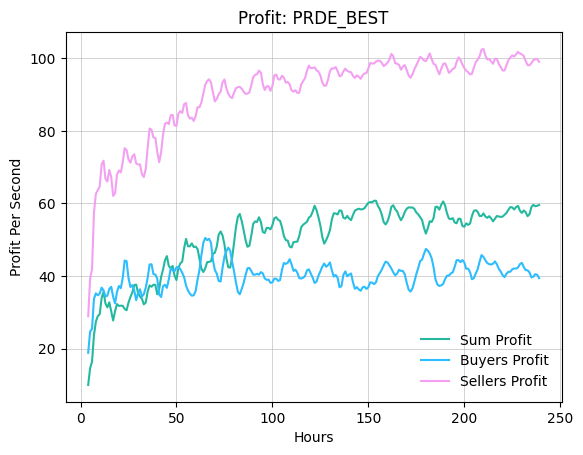

k=8, F=1.9  95.07607949999999


In [57]:
prde_best_sma = plot_csv('improved_outputs/PRDE_vs_BEST1/alone/trail1_strats.csv')
print("k=8, F=1.9 ", np.median(prde_best_sma))